<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Análisis de Datos y Machine Learning en Python 1 - Clase 9**

Juan Camilo Zapata Ceballos   
Facultad de Ciencias Exactas y Naturales   
Universidad de Antioquia   
2023

# **12. Seaborn**

* <a href="#s1">12.1. Introducción</a><br>

* <a href="#s2">12.2. Bases de Datos</a><br>

* <a href="#s3">12.3. Graficadores</a><br>
  - <a href="#s31">12.3.1. Histplot</a><br>
  - <a href="#s32">12.3.2. Countplot</a><br>
  - <a href="#s33">12.3.3. Scatterplot</a><br>

* <a href="#s4">12.4. Problemas Adicionales</a><br>


Para empezar se debe importar Matplotlib y Seaborn:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<p><a name="s"></a></p>

## **12.1. Introducción**

Seaborn es una librería de Python que toma un rol importante en el ámbito científico y en la representación de resultados. Esta herramienta proporciona una interfaz de alto nivel para realizar gráficos estadísticos atractivos e informativos. Está basada en Matplotlib, por lo que hereda todas las funcionalidades de esta librería que permiten la personalización de gráficas: creación y modificación de títulos, etiquetas, marcadores y leyendas, el cambio de colores y de estilos, entre otros. Está pensada para integrarse fácilmente con las series y los dataframes de Pandas, haciendo que la representación gráfica de estas estructuras de datos sea sencilla e intuitiva.

<p><img alt="Colaboratory logo" height="70px" src="https://seaborn.pydata.org/_static/logo-wide-lightbg.svg" align="left" hspace="10px" vspace="0px"></p>   

<br clear="left"/>

**Objetivos:**

* Aprender la sintáxis básica para trabajar con Seaborn.
* Conocer los graficadores: $histplot$, $countplot$ y $scatterplot$.
* Modificar parámetros de los graficadores para obtener representaciones objetivas de los datos: $hue$, $stat$, $multiple$, $style$ y $size$.
* Integrar Matplotlib con Seaborn para personalizar los gráficos.
* Analizar e interpretar datos, con ayuda de los gráficos, para orientar la toma de decisiones.

**Palabras Claves:** base de datos, graficador.

<p><a name="s2"></a></p>

## **12.2. Bases de Datos**

Seaborn posee bases de datos que están organizadas y listas para visualizar. Entre ellas se encuentran:

In [ ]:
#Tips
df = sns.load_dataset('tips')
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
213,13.27,2.50,Female,Yes,Sat,Dinner,2
177,14.48,2.00,Male,Yes,Sun,Dinner,2
163,13.81,2.00,Male,No,Sun,Dinner,2
224,13.42,1.58,Male,Yes,Fri,Lunch,2
132,11.17,1.50,Female,No,Thur,Lunch,2


In [ ]:
#Attention
df = sns.load_dataset('attention')
df.sample(5)

,Unnamed: 0,subject,attention,solutions,score
6,6,7,divided,1,5.0
40,40,1,divided,3,7.0
45,45,6,divided,3,6.0
39,39,20,focused,2,6.0
24,24,5,divided,2,5.0


In [ ]:
#Titanic
df = sns.load_dataset('titanic')
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
653,1,3,female,NaN,0,0,7.8292,Q,Third,woman,False,NaN,Queenstown,yes,True
421,0,3,male,21.0,0,0,7.7333,Q,Third,man,True,NaN,Queenstown,no,True
491,0,3,male,21.0,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True
785,0,3,male,25.0,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True
808,0,2,male,39.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True


Para acceder al nombre de las bases de datos se usa el método `get_dataset_names`. Veamos:

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Nótese que estas bases de datos son DataFrames de Pandas. Para más detalles visite [Bases de Datos](https://github.com/mwaskom/seaborn-data).

### <font color='green'>**Ejercicio 1** </font>

Cargue la base de datos $flights$ y explique en que consiste.

***Ayuda:*** Puede que le sea útil el método $load\_dataset$.

In [ ]:
df = sns.load_dataset('flights')
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


<p><a name="s3"></a></p>

## **12.3. Graficadores**

Seaborn posee una gran variedad de graficadores, su sintáxis, en general es `graficador(data=datos, modificaciones)`. Donde `datos` son los datos de un DataFrame que se quieren graficar y `modificaciones` son los parámetros que permiten llevar a cabo la personalización.

<p><a name="s31"></a></p>

### **12.3.1. Histplot**

El graficador `Histplot`permite dibujar histogramas:

In [ ]:
df = sns.load_dataset('tips')
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
29,19.65,3.00,Female,No,Sat,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
9,14.78,3.23,Male,No,Sun,Dinner,2
169,10.63,2.00,Female,Yes,Sat,Dinner,2
50,12.54,2.50,Male,No,Sun,Dinner,2


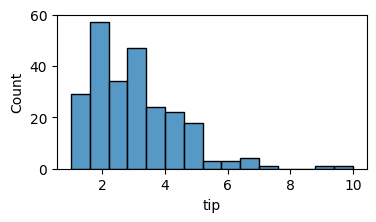

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(4,2))
ax = sns.histplot(data=df, x='tip', bins=15)
ax.set_ylim([0,60])
fig.show()

El parámetro `hue` sirve para asignar colores a las barras dados los elementos de una categoría. Veamos:

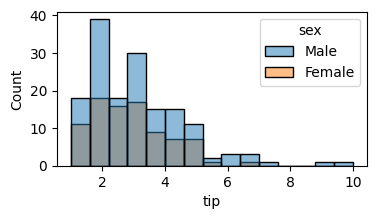

In [ ]:
#Sex
fig, ax = plt.subplots(1,1, figsize=(4,2))
sns.histplot(data=df, x='tip', bins=15, hue='sex')
fig.show()

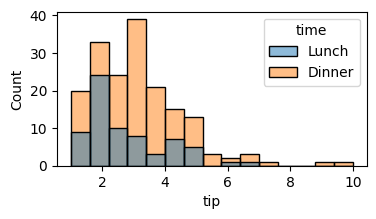

In [ ]:
#Time
fig, ax = plt.subplots(1,1, figsize=(4,2))
sns.histplot(data=df, x='tip', bins=15, hue='time')
fig.show()

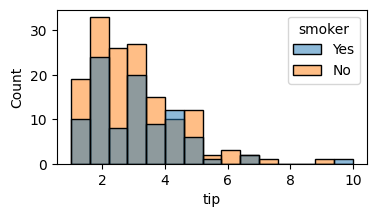

In [ ]:
#Smoker
fig, ax = plt.subplots(1,1, figsize=(4,2))
sns.histplot(data=df, x='tip', bins=15, hue='smoker')
fig.show()

In [ ]:
#Time
sns.histplot(data=df, x='tip', bins=15, hue='time')
plt.show()

El parámetro `stat` permite cambiar la representación estadística del eje vertical. Veamos:

In [ ]:
#Count
sns.histplot(data=df, x='tip', bins=15, hue='sex', stat='count')
plt.show()

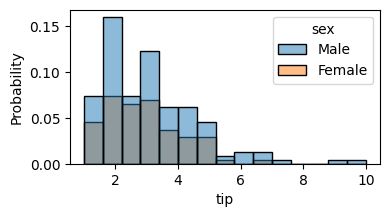

In [ ]:
#Probability
fig, ax = plt.subplots(1,1, figsize=(4,2))
sns.histplot(data=df, x='tip', bins=15, hue='sex', stat='probability')
plt.show()

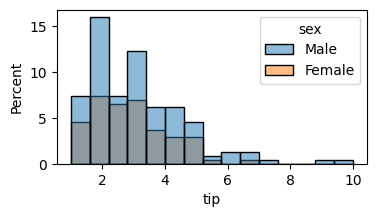

In [ ]:
#Percent
fig, ax = plt.subplots(1,1, figsize=(4,2))
sns.histplot(data=df, x='tip', bins=15, hue='sex', stat='percent')
plt.show()

El parámetro `multiple` permite cambiar la representación de las barras. Veamos:

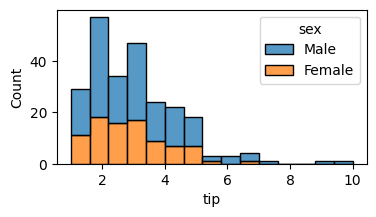

In [ ]:
#Stack
fig, ax = plt.subplots(1,1, figsize=(4,2))
sns.histplot(data=df, x='tip', bins=15, hue='sex', stat='count', multiple='stack')
plt.show()

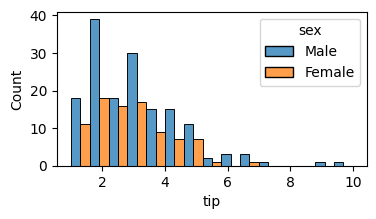

In [ ]:
#Dodge
fig, ax = plt.subplots(1,1, figsize=(4,2))
sns.histplot(data=df, x='tip', bins=15, hue='sex', multiple='dodge')
plt.show()

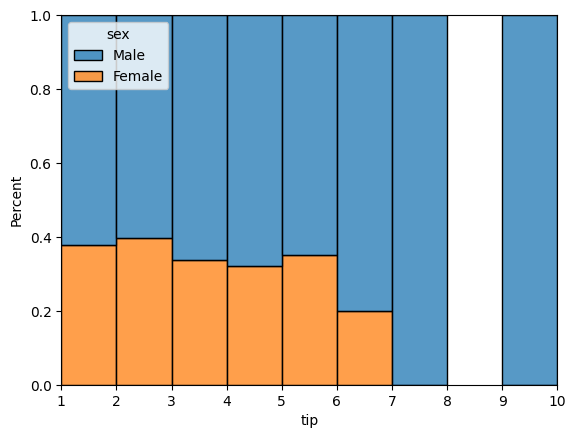

In [ ]:
#Fill
#fig, ax = plt.subplots(1,1, figsize=(4,2))
sns.histplot(data=df, x='tip', bins=9, hue='sex', stat="percent", multiple='fill')
plt.show()

In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Para más detalles visite [Histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html).

### <font color='green'>**Ejercicio 2** </font>

Cargue la base de datos $titanic$ y efectúe:

1. Genere un histograma con la columna $age$.
2. Use el parámetro $hue$ para categorizar por $sex$.
3. Use el parámetro $stat$ con estado $percent$. ¿Qué sucede?
4. Use el parámetro $multiple$ con estado $layer$. ¿Qué sucede?
5. Cambie todas las etiquetas al español.
6. ¿Qué puede concluir con este diagrama?

***Ayuda 1:*** Puede que le sea útil el graficador $histplot$.   
***Ayuda 2:*** Implemente los métodos de personalización de Matplotlib.


In [ ]:
df = sns.load_dataset("titanic")
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


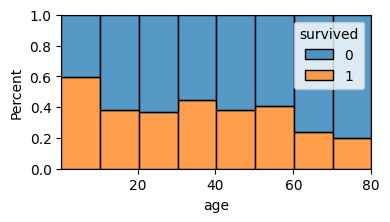

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(4,2))
sns.histplot(data=df, x='age', bins=8, hue='survived', stat="percent", multiple='fill')
plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


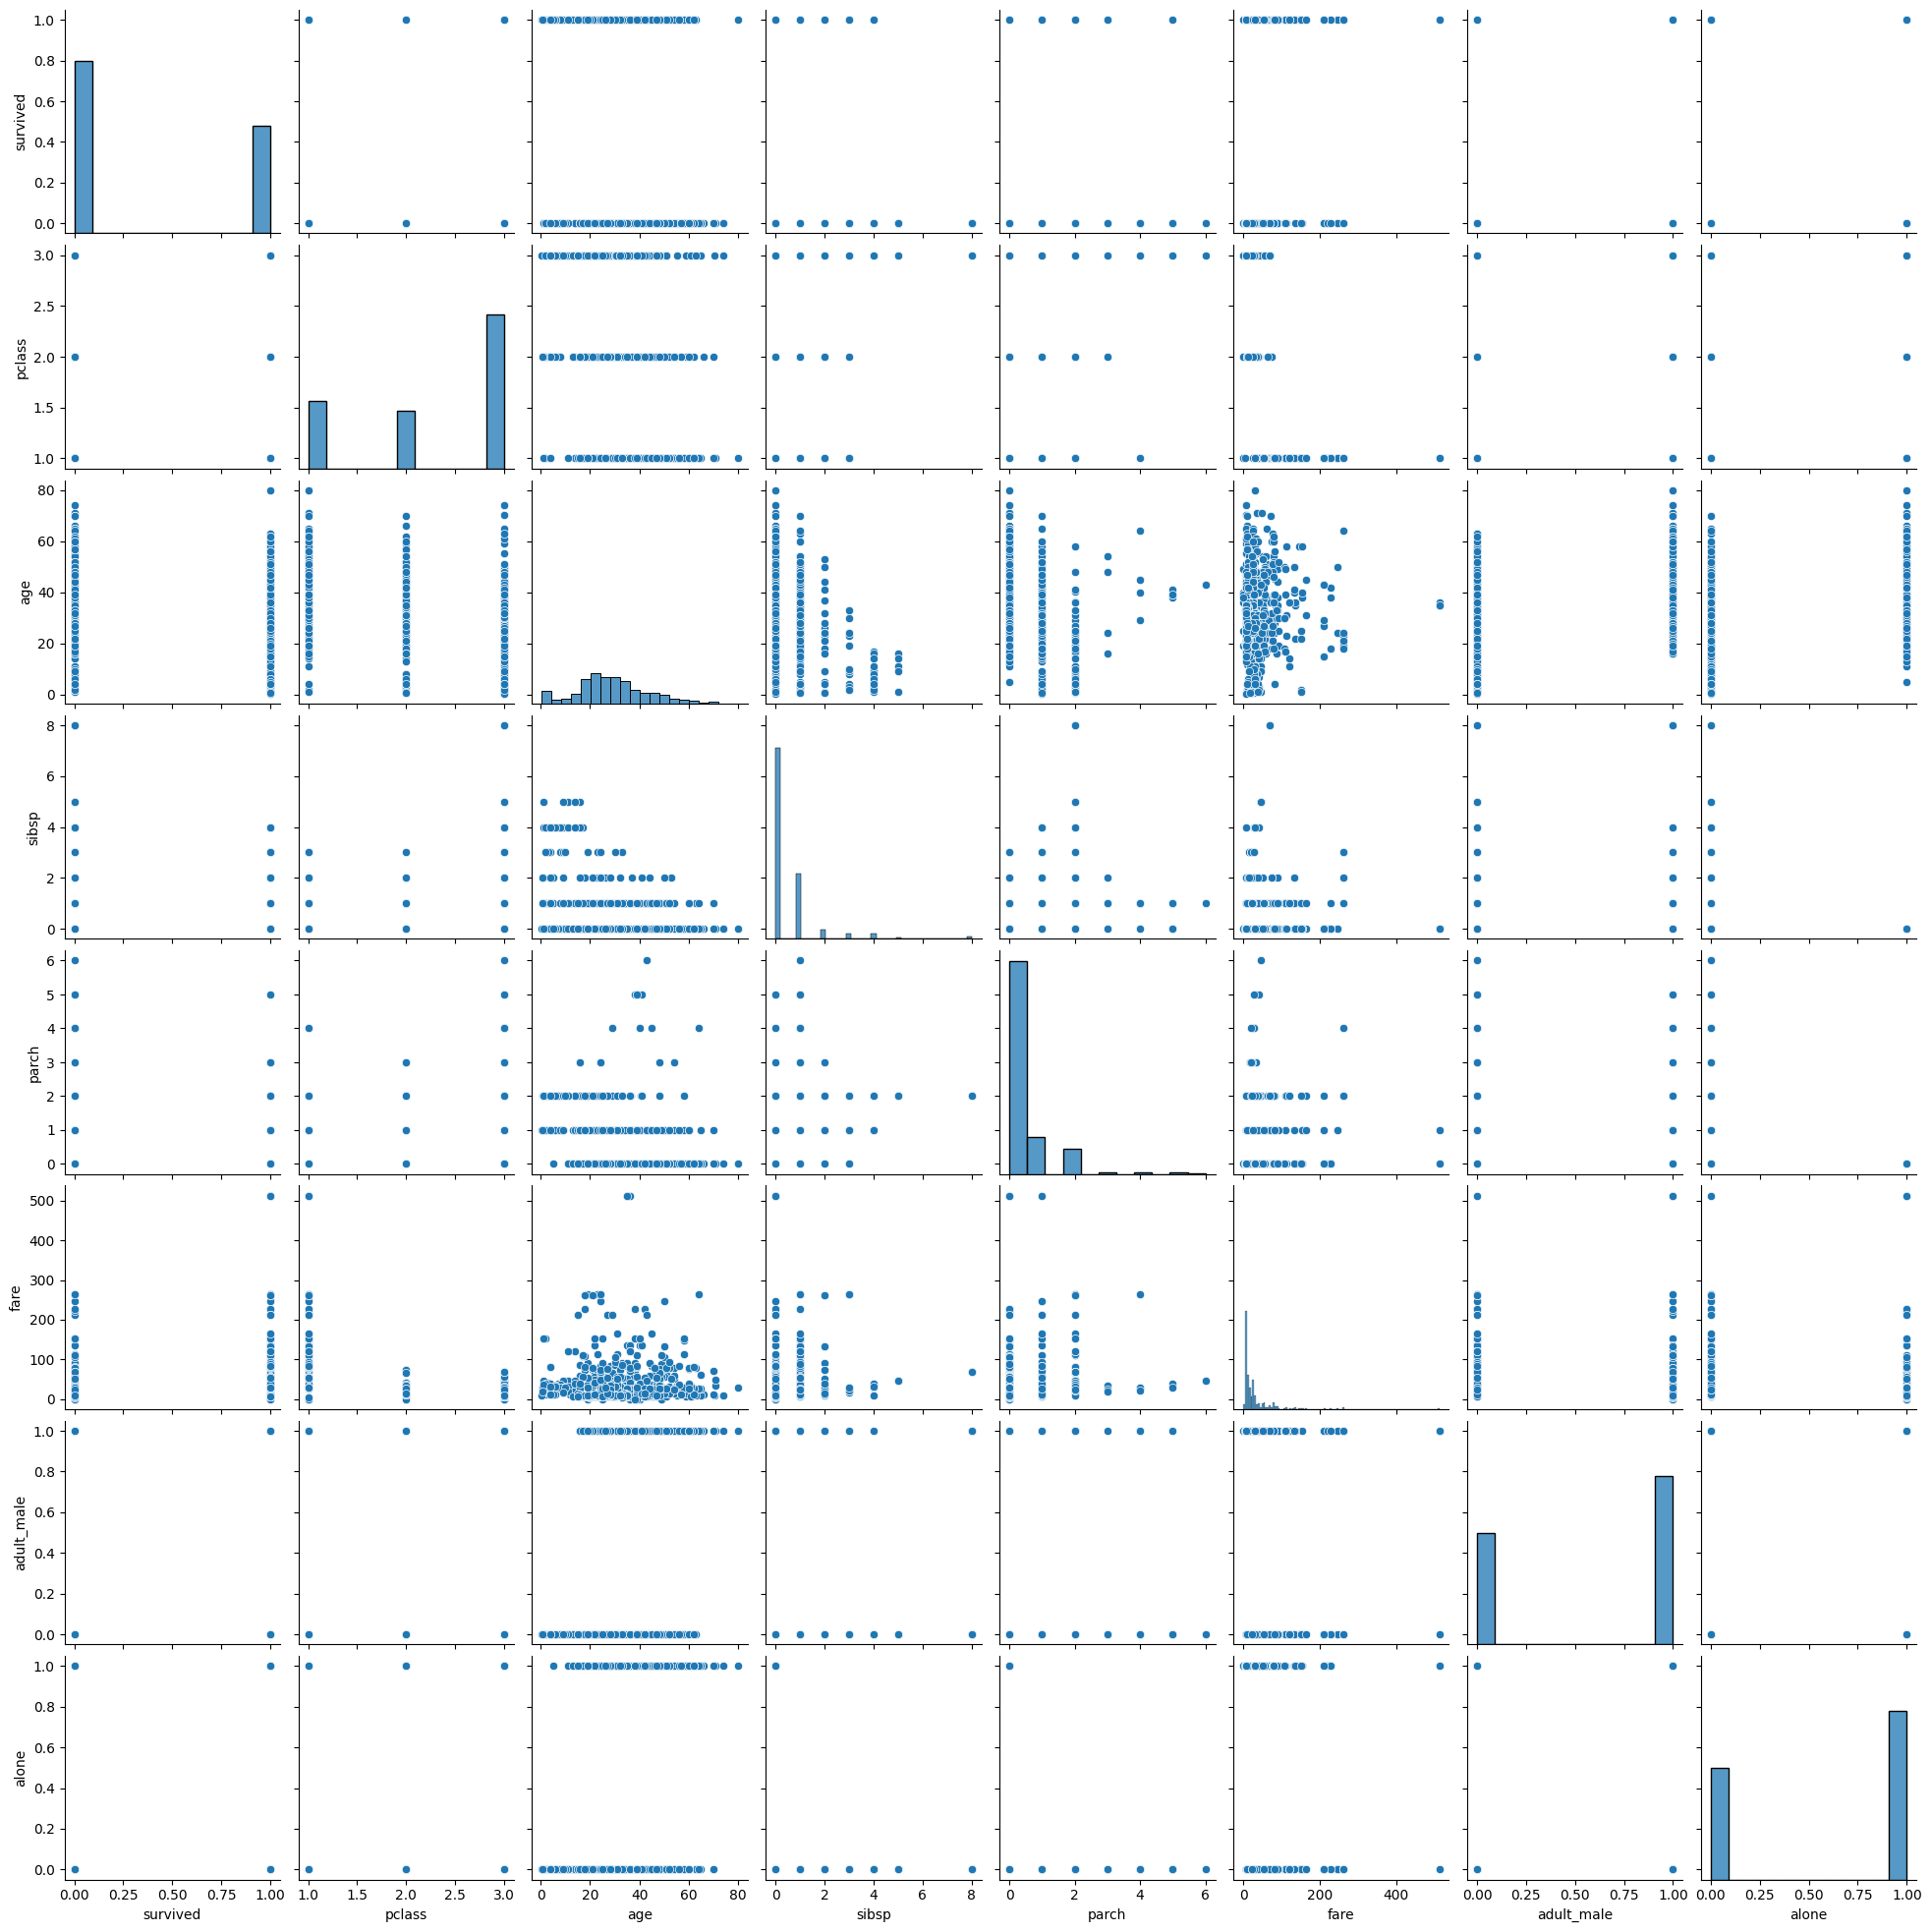

In [ ]:
sns.pairplot(data=df)

<p><a name="s32"></a></p>

### **12.3.2. Countplot**

El graficador `Countplot`permite dibujar variables categóricas (por cualidades):

In [ ]:
df = sns.load_dataset('tips')
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
194,16.58,4.00,Male,Yes,Thur,Lunch,2
134,18.26,3.25,Female,No,Thur,Lunch,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
69,15.01,2.09,Male,Yes,Sat,Dinner,2
149,7.51,2.00,Male,No,Thur,Lunch,2


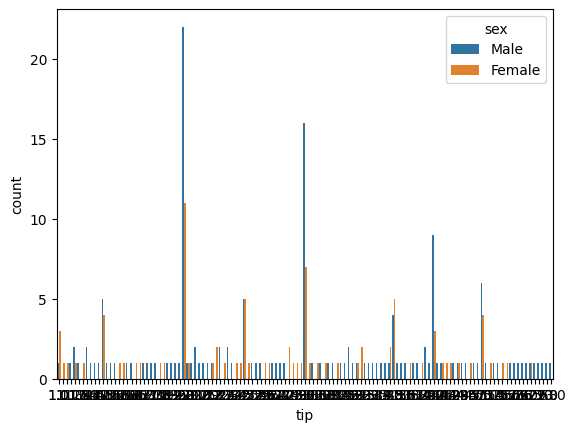

In [ ]:
#Tip
sns.countplot(data=df, x='tip', hue='sex')
plt.show()

Este graficador no es adecuado para la variable $tip$, puesto que es numérica. Veamos las que sí:

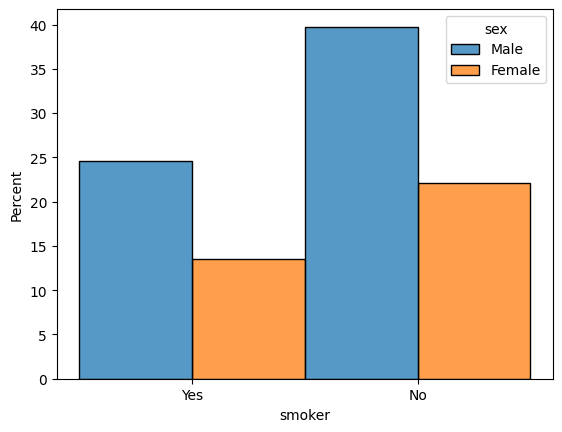

In [ ]:
sns.histplot(data=df, x='smoker', hue='sex', stat="percent", multiple="dodge")
plt.show()

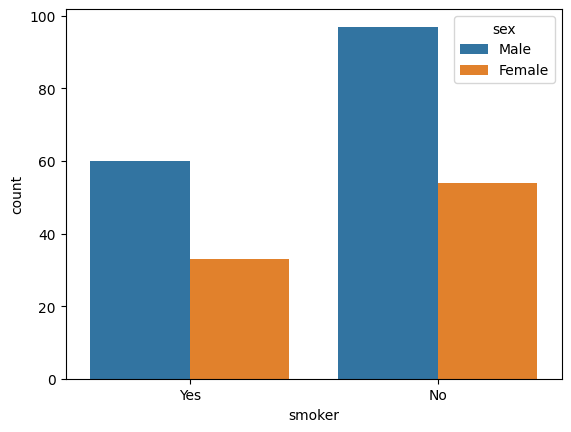

In [ ]:
#Smoker
sns.countplot(data=df, x='smoker', hue='sex')
plt.show()

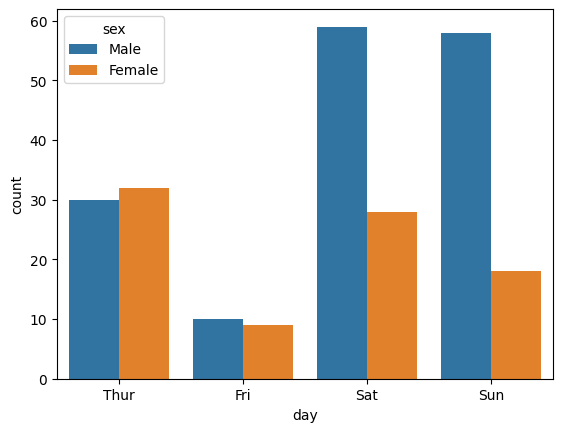

In [ ]:
#Day
sns.countplot(data=df, x='day', hue='sex')
plt.show()

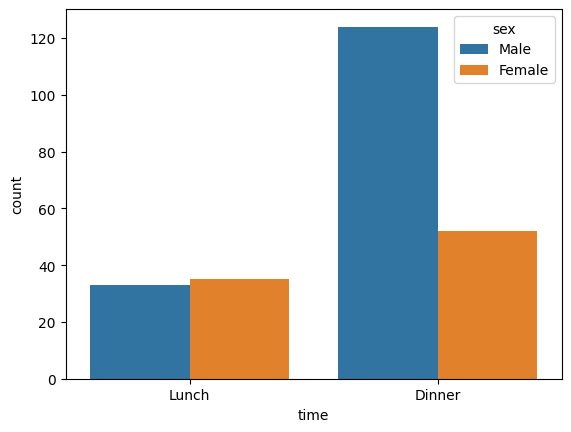

In [ ]:
#Time
sns.countplot(data=df, x='time', hue='sex')
plt.show()

Otros graficadores para dibujar variables categóricas son: `stripplot`, `swarmplot`, `boxplot` y `violinplot`. Visite [Categorical Data](https://seaborn.pydata.org/tutorial/categorical.html).

### <font color='green'>**Ejercicio 3** </font>

¿Qué diferencia una variable numérica de una categórica?



### <font color='green'>**Ejercicio 4** </font>

Con la base de datos del ejercicio resuelto 12.2, efectúe:

1. Genere un diagrama de conteo con la columna $alive$.
2. Use el parámetro $hue$ para categorizar por $sex$.
3. Cambie todas las etiquetas al español.
4. ¿Qué puede concluir con este diagrama?

***Ayuda:*** Puede que le sea útil el graficador $countplot$.   


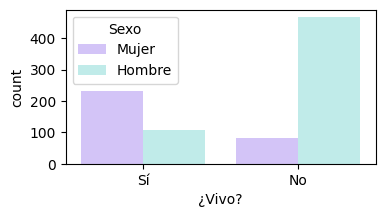

In [ ]:
df = sns.load_dataset("titanic")
sns.set_palette(sns.color_palette("pastel"))

fig, ax = plt.subplots(1,1, figsize=(4,2))

ax = sns.countplot(data=df, x='alive', order=["yes","no"], hue='sex',
                   hue_order=["female","male"], palette={"female":"C4","male":"C9"})
ax.set_xlabel("¿Vivo?")
ax.set_xticklabels(["Sí","No"])
ax.legend(['Mujer','Hombre'], title='Sexo')

fig.show()

<p><a name="s33"></a></p>

### **12.3.3. Scatterplot**

El graficador `Scatterplot`permite dibujar diagramas de puntos o de dispersión:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = sns.load_dataset('tips')
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
19,20.65,3.35,Male,No,Sat,Dinner,3
203,16.40,2.50,Female,Yes,Thur,Lunch,2
240,27.18,2.00,Female,Yes,Sat,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
82,10.07,1.83,Female,No,Thur,Lunch,1


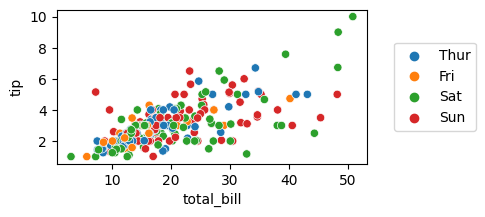

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(4,2))

ax = sns.scatterplot(data=df, x='total_bill', y='tip', hue='day')
plt.legend(loc='center', bbox_to_anchor=(1.22, 0.5))
plt.show()

El parámetro `style` sirve para cambiar el marcador de los puntos dado los valores de una variable. Veamos:

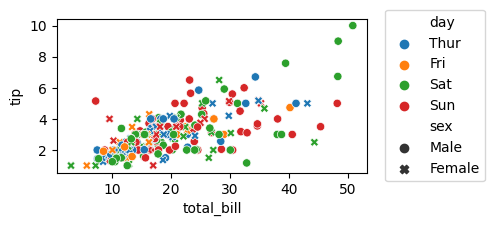

In [ ]:
#Sex
fig, ax = plt.subplots(1,1, figsize=(4,2))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='day', style='sex')
plt.legend(loc='center', bbox_to_anchor=(1.22, 0.5))
plt.show()

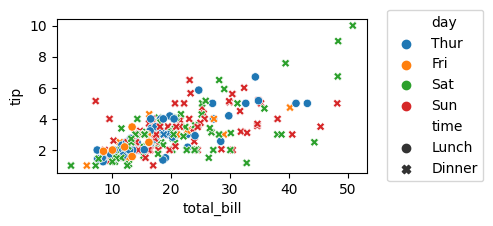

In [ ]:
#Time
fig, ax = plt.subplots(1,1, figsize=(4,2))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='day', style='time')
plt.legend(loc='center', bbox_to_anchor=(1.22, 0.5))
plt.show()

In [ ]:
cond = (df.loc[:, "tip"]>6) & (df.loc[:, "total_bill"]>38)
df.loc[cond, :]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


In [ ]:
maxi = df.loc[:, "total_bill"].max()
cond = df.loc[:, "total_bill"] == maxi
df.loc[cond, :]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3


In [ ]:
cond = df.loc[:, "total_bill"].idxmax()
df.loc[cond, :]

total_bill     50.81
tip             10.0
sex             Male
smoker           Yes
day              Sat
time          Dinner
size               3
Name: 170, dtype: object

El parámetro `size` sirve para cambiar el tamaño de los puntos dado los valores de una variable. Veamos:

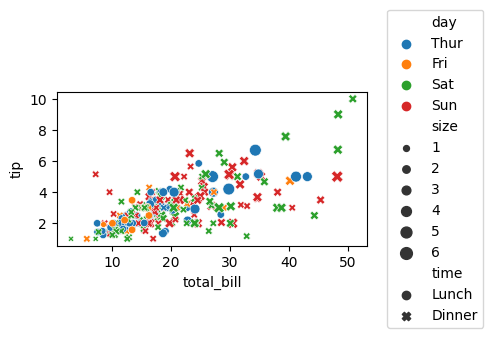

In [ ]:
#Sex
fig, ax = plt.subplots(1,1, figsize=(4,2))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='day', style='time', size='size')
plt.legend(loc='center', bbox_to_anchor=(1.22, 0.5))
plt.show()

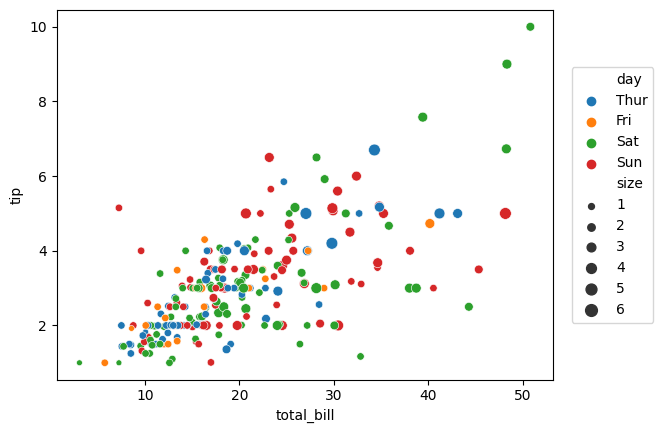

In [ ]:
#Size
sns.scatterplot(data=df, x='total_bill', y='tip', hue='day', size='size')
plt.legend(loc='center', bbox_to_anchor=(1.12, 0.5))
plt.show()

Nótese la integración con Matplotlib. Para más detalles visite [Scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

### <font color='green'>**Ejercicio 5** </font>

Con la base de datos del ejercicio resuelto 12.2, efectúe:

1. Genere un diagrama de dispersión con las columnas $age$ y $fare$.
2. Use el parámetro $hue$ para categorizar por $sex$.
3. Use el parámetro $style$ con estado $alive$. ¿Qué sucede?
4. Use el parámetro $size$ con estado $class$. ¿Qué sucede?
5. Cambie todas las etiquetas al español.
6. ¿Qué puede concluir con este diagrama?

***Ayuda:*** Puede que le sea útil el graficador $scatterplot$.   



In [ ]:
df = sns.load_dataset("titanic")
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
marcadores

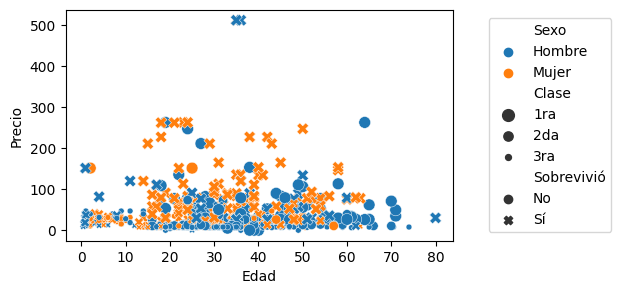

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5,3))

ax = sns.scatterplot(data=df, x='age', y='fare', hue='sex', size='class', style="alive")
marcadores, _ = ax.get_legend_handles_labels()
etiquetas_2 = ['Sexo','Hombre','Mujer','Clase','1ra','2da','3ra','Sobrevivió','No','Sí']
ax.legend(marcadores, etiquetas_2, loc='center', bbox_to_anchor=(1.25,0.50))
ax.set_xlabel("Edad")
ax.set_ylabel("Precio")

plt.show()

<p><a name="s4"></a></p>

## **12.4. Problemas Adicionales**

### <font color='green'>**Ejercicio Propuesto 7** </font>

Cargue el archivo *Libros.csv* y efectúe:

1. Genere un histograma con la columna $Price$.
2. Use el parámetro $hue$ para categorizar por $Genre$.
3. Use el parámetro $stat$ con estado $percent$.
4. Use el parámetro $multiple$ con estado $dodge$.
5. Cambie todas las etiquetas al español.
6. ¿Qué puede concluir con este diagrama?

***Ayuda 1:*** El archivo se encuentra en la carpeta *Datos/Pandas*.  
***Ayuda 2:*** Puede que le sea útil el graficador $histplot$.   
***Ayuda 3:*** Implemente los métodos de personalización de Matplotlib.

### <font color='green'>**Ejercicio Propuesto 8** </font>

Cargue el archivo *ParticipacionesMundiales.xlsx* y efectúe:

1. Genere un diagrama de conteo con la columna $T\text{í}tulo$.
2. Use el parámetro $hue$ para categorizar por $Confederaci\text{ó}n$.
3. ¿Qué puede concluir con este diagrama?

***Ayuda 1:*** El archivo se encuentra en la carpeta *Datos/Pandas*.  
***Ayuda 2:*** Puede que le sea útil el graficador $countplot$.   

### <font color='green'>**Ejercicio Propuesto 9** </font>

Con el archivo *ParticipacionesMundiales.xlsx*, efectúe:

1. Genere un diagrama de dispersión con $Primera \ Ronda$ y $T\text{í}tulos$.
2. Use el parámetro $hue$ para categorizar por $Confederaci\text{ó}n$.
3. ¿Qué puede concluir con este diagrama?

***Ayuda:*** Puede que le sea útil el graficador $scatterplot$.   